# INFO
- **● time_of_posts** = The time the job was posted on Hipages.
- **● latitudes** = The latitude of the job location,
- **● longitudes** = The longitude of the job location
- **● categorys** = An integer which represents the category for which the job is assigned. A
- **● categorys** (for example, painting, plumbing or air conditioning) allows us to assign the job to tradies who will be interested in the job.
- **● number_of_tradies** = The number of tradies who we can send this job out to.
- **● estimated_size** = The estimated size of the job, this is proportional to the amount
of revenue the tradie might get from the job.
- **● number_of_impressions** = The number of impressions the job gets from the trades.
- **● accepted** = A Boolean which represents if a tradie accepts a job invitation
(meaning that they have indicated to Hipages that they would like us to provide
them with the contact details of the consumer). 1 means at least one tradie was
interested while 0 means no tradie was interested. This is the target variable you
should focus to uncover its causal relationships with the other data.

# Questions

- Does the time-of-day influence if a job would be accepted?
- Can we predict using the data we have if a job would be accepted?
- How effective is estimated size to uncover differences in jobs, tradies, or behaviours?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


jobs = pd.read_csv('Data Analytics Case Study - jobs.csv')

jobs.head(5)

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted
0,2019-09-15 11:40:06,-37.8994,144.9799,8,8376,medium,1004.0,0
1,2019-09-11 15:12:06,-37.8063,144.9964,3,5089,medium,772.0,0
2,2019-09-10 15:53:06,-37.8901,144.8885,7,3677,small,1103.0,0
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1
4,2019-09-10 17:38:06,-33.9091,151.2039,6,2476,small,360.0,0


In [3]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_of_post           9999 non-null   object 
 1   latitude               9999 non-null   float64
 2    longitude             9999 non-null   float64
 3   category               9999 non-null   int64  
 4   number_of_tradies      9999 non-null   int64  
 5   estimated_size         9999 non-null   object 
 6   number_of_impressions  9889 non-null   float64
 7   accepted               9999 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [4]:
jobs.describe()

,latitude,longitude,category,number_of_tradies,number_of_impressions,accepted
count,9999.000000,9999.000000,9999.000000,9999.000000,9889.000000,9999.000000
mean,-34.613654,146.508822,4.819982,4225.784678,1015.828901,0.263626
std,4.786739,7.078573,1.857602,3020.932017,481.730727,0.440621
min,-38.221600,121.939400,1.000000,355.000000,-745.000000,0.000000
25%,-37.799350,144.937650,3.000000,1627.000000,689.000000,0.000000
50%,-34.000800,145.138800,5.000000,3677.000000,1007.000000,0.000000
75%,-33.841800,151.206350,6.000000,7267.000000,1339.000000,1.000000
max,-17.548400,151.542900,9.000000,10000.000000,3245.000000,1.000000


In [5]:
jobs['category'].value_counts()

5    1966
4    1952
6    1602
3    1378
7    1133
2     845
8     621
1     287
9     215
Name: category, dtype: int64

In [6]:
jobs['accepted'].value_counts()

0    7363
1    2636
Name: accepted, dtype: int64

In [7]:
jobs['accepted'].groupby(jobs['category']).value_counts()

category  accepted
1         0            210
          1             77
2         0            646
          1            199
3         0            834
          1            544
4         0           1441
          1            511
5         0           1657
          1            309
6         0           1122
          1            480
7         0            837
          1            296
8         0            464
          1            157
9         0            152
          1             63
Name: accepted, dtype: int64

In [8]:
jobs['time_of_post'] = pd.to_datetime(jobs['time_of_post'])

In [9]:
jobs['date'] = jobs['time_of_post'].dt.date
jobs['time'] = jobs['time_of_post'].dt.time

In [10]:
jobs['time'].value_counts()

12:25:06    22
10:03:06    19
12:01:06    19
13:43:06    18
11:32:06    18
            ..
03:07:06     1
04:22:07     1
02:56:07     1
19:26:07     1
00:53:06     1
Name: time, Length: 1969, dtype: int64

In [11]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time_of_post           9999 non-null   datetime64[ns]
 1   latitude               9999 non-null   float64       
 2    longitude             9999 non-null   float64       
 3   category               9999 non-null   int64         
 4   number_of_tradies      9999 non-null   int64         
 5   estimated_size         9999 non-null   object        
 6   number_of_impressions  9889 non-null   float64       
 7   accepted               9999 non-null   int64         
 8   date                   9999 non-null   object        
 9   time                   9999 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 781.3+ KB


In [12]:
jobs.describe()

,latitude,longitude,category,number_of_tradies,number_of_impressions,accepted
count,9999.000000,9999.000000,9999.000000,9999.000000,9889.000000,9999.000000
mean,-34.613654,146.508822,4.819982,4225.784678,1015.828901,0.263626
std,4.786739,7.078573,1.857602,3020.932017,481.730727,0.440621
min,-38.221600,121.939400,1.000000,355.000000,-745.000000,0.000000
25%,-37.799350,144.937650,3.000000,1627.000000,689.000000,0.000000
50%,-34.000800,145.138800,5.000000,3677.000000,1007.000000,0.000000
75%,-33.841800,151.206350,6.000000,7267.000000,1339.000000,1.000000
max,-17.548400,151.542900,9.000000,10000.000000,3245.000000,1.000000


In [13]:
jobs['accepted'].groupby(jobs['time']).value_counts()

time      accepted
00:00:06  0           1
00:01:06  0           2
00:03:06  0           2
          1           1
00:04:06  0           3
                     ..
22:56:06  0           4
          1           2
22:57:06  0           1
22:58:07  0           1
22:59:06  1           1
Name: accepted, Length: 2918, dtype: int64

In [14]:
# Define a function to categorize time into parts of the day
def categorise_time(time):
    if time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    elif 17 <= time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [15]:
jobs['time_category'] = jobs['time_of_post'].dt.time.apply(categorise_time)

In [16]:
jobs['accepted'].groupby(jobs['time_category']).value_counts().sort_values(ascending=False)

time_category  accepted
Morning        0           4489
Afternoon      0           1828
               1           1360
Evening        0            824
               1            589
Morning        1            528
Night          0            222
               1            159
Name: accepted, dtype: int64

In [17]:
acceptedjobs = jobs['accepted'].isin([True])

In [18]:
jobs[acceptedjobs].head()

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,date,time,time_category
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1,2019-09-10,11:38:06,Morning
8,2019-09-15 15:42:06,-38.0545,144.9955,7,3677,medium,1642.0,1,2019-09-15,15:42:06,Afternoon
21,2019-09-15 14:49:06,-37.8261,144.9803,8,8376,small,1210.0,1,2019-09-15,14:49:06,Afternoon
23,2019-09-13 16:09:06,-33.9457,151.1543,6,2476,medium,711.0,1,2019-09-13,16:09:06,Afternoon
33,2019-09-14 14:28:06,-33.7730,151.1242,7,4242,medium,1180.0,1,2019-09-14,14:28:06,Afternoon


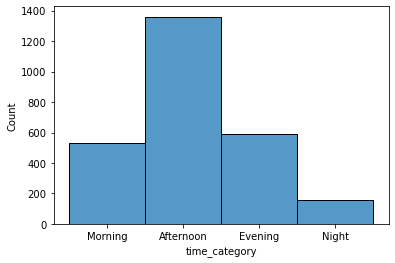

In [19]:
sns.histplot(data=jobs[acceptedjobs], x='time_category', binwidth=1)
plt.show()

In [20]:
jobs.isnull().sum()

time_of_post               0
latitude                   0
 longitude                 0
category                   0
number_of_tradies          0
estimated_size             0
number_of_impressions    110
accepted                   0
date                       0
time                       0
time_category              0
dtype: int64

In [21]:
jobs['number_of_impressions'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: number_of_impressions, dtype: bool

In [36]:
jobs[acceptedjobs].groupby('category').size().sort_values(ascending=False)


category
3    544
4    511
6    480
5    309
7    296
2    199
8    157
1     77
9     63
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
jobs['time_category'] = le.fit_transform(jobs['time_category'])

<AxesSubplot:>

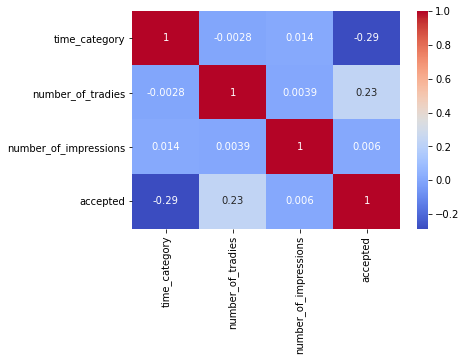

In [69]:
sns.heatmap(jobs[['time_category','number_of_tradies','estimated_size','number_of_impressions','accepted']].corr(), annot=True, cmap="coolwarm")

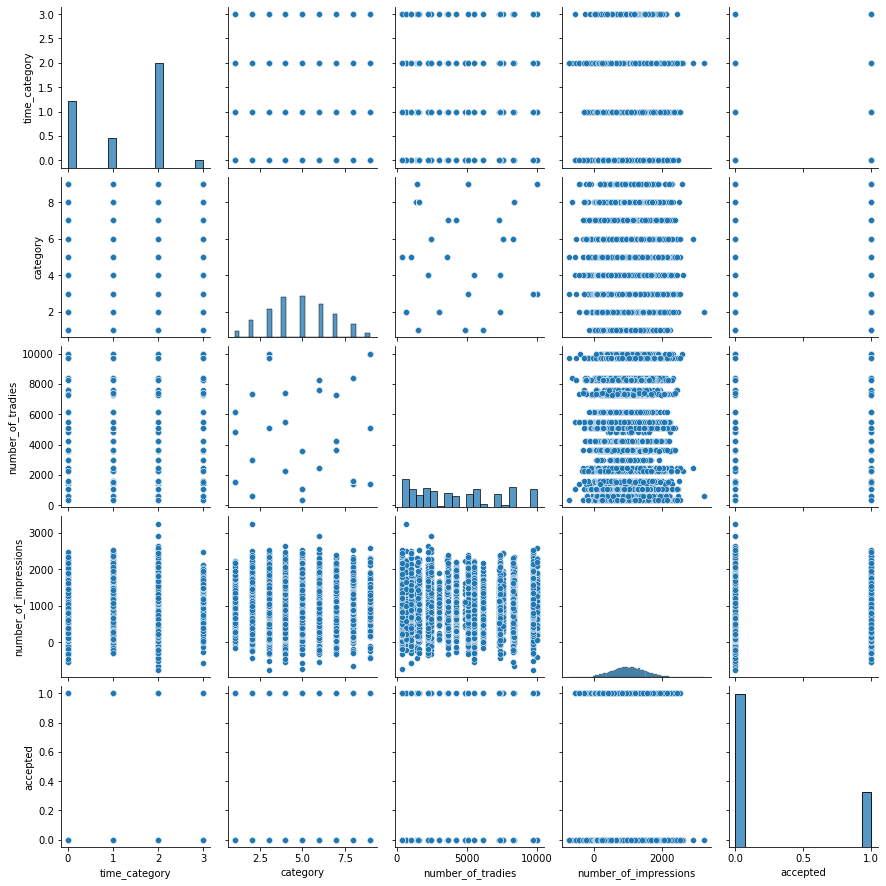

In [64]:
sns.pairplot(jobs[['time_category','category','number_of_tradies','estimated_size','number_of_impressions','accepted']])

plt.show()

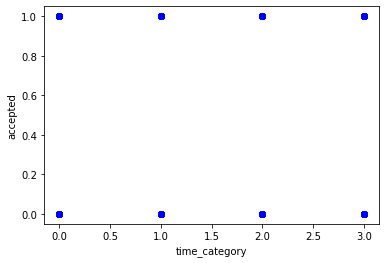

In [68]:
plt.scatter(jobs['time_category'],jobs['accepted'], c='blue', alpha=0.5)

plt.xlabel('time_category')
plt.ylabel('accepted')
plt.show()